In [1]:
from neural_lam.datastore import init_datastore

datastore_kind = 'mdp'
config_path = 'C:/Users/23603526/Documents/GitHub/neural-lam-Divan/era5/era.datastore.yaml'

datastore = init_datastore(
        datastore_kind=datastore_kind,
        config_path = config_path,
    )

2025-01-22 13:23:59.287 | WARNING  | neural_lam.datastore.mdp:__init__:63 - Config file has been modified since zarr was created. The old zarr archive (in C:\Users\23603526\Documents\GitHub\neural-lam-Divan\era5\era.datastore.zarr) will be used.To generate new zarr-archive, move the old one first.
c:\Users\23603526\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


The loaded datastore contains the following features:
 state   : z850.0hPa r850.0hPa t850.0hPa u850.0hPa v850.0hPa w850.0hPa wind_speed850.0hPa
 forcing : hour month
 static  : lsm
With the following splits (over time):
 train   : 2010-01-01T00:00 to 2017-06-01T00:00
 val     : 2017-07-01T00:00 to 2018-11-01T00:00
 test    : 2018-12-01T00:00 to 2019-12-31T00:00


# Understanding datastores

In [2]:
from neural_lam.config import load_config_and_datastore

config_path = 'C:/Users/23603526/Documents/GitHub/neural-lam-Divan/era5/config.yaml'
config, datastore = load_config_and_datastore(config_path=config_path)

2025-01-22 13:24:13.561 | WARNING  | neural_lam.datastore.mdp:__init__:63 - Config file has been modified since zarr was created. The old zarr archive (in C:\Users\23603526\Documents\GitHub\neural-lam-Divan\era5\era.datastore.zarr) will be used.To generate new zarr-archive, move the old one first.


The loaded datastore contains the following features:
 state   : z850.0hPa r850.0hPa t850.0hPa u850.0hPa v850.0hPa w850.0hPa wind_speed850.0hPa
 forcing : hour month
 static  : lsm
With the following splits (over time):
 train   : 2010-01-01T00:00 to 2017-06-01T00:00
 val     : 2017-07-01T00:00 to 2018-11-01T00:00
 test    : 2018-12-01T00:00 to 2019-12-31T00:00


In [79]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

seed = 0
windows = 5
time_ = slice(seed, seed + windows)
varialbe = 6



unstacked.shape

(5, 69, 49)

In [37]:
# import xarray as xr
# import numpy as np
# import pandas as pd

# from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import cartopy.crs as ccrs

# import torch.nn as nn
# from torch.utils.data import Dataset

from IPython.display import HTML

# import torch

# from typing import Tuple

def plot_example(datastore, seed: int = 0, windows: int = 7, varialbe: int = 6, frame_rate: int = 16, levels: int = 10) -> HTML:
    time_ = slice(seed, seed + windows)
    states = datastore.unstack_grid_coords(datastore._ds["state"].isel(time=time_, state_feature=varialbe))
    
    lon, lat = states.coords['x'], states.coords['y']
        
    bounds = [lon.min().item(), lon.max().item(), lat.min().item(), lat.max().item()]
    
    time_states = states.time.values

    fig, ax = plt.subplots(1, 1, figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})

    vmin = states.values.min()
    vmax = states.values.max()

    fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9, wspace=0.2)

    print('States:', states.shape)

    ax.set_extent(bounds, crs=ccrs.PlateCarree())
    ax.coastlines()

    stat = ax.contourf(lon, lat, states[0].transpose('y', 'x'), levels=levels, vmin=vmin, vmax = vmax, transform=ccrs.PlateCarree())
    ax.set_title(f'Window {0} - {time_states[0]}')

    fig.colorbar(stat, ax=ax, orientation='vertical', label='Wind Speed (m/s)')

    def animate(i):
        ax.clear()
        ax.coastlines()

        ax.contourf(lon, lat, states[i].transpose('y', 'x'), levels=levels, vmin=vmin, vmax = vmax)

        ax.set_title(f'Window {i} - {time_states[i]}') # .strftime("%Y-%m-%d %H:%M:%S")
            
    frames = states.shape[0]

    interval = 1000 / frame_rate

    ani = FuncAnimation(fig, animate, frames=frames, interval=interval)

    plt.close(fig)

    return HTML(ani.to_jshtml())

plot_example(datastore, seed=1, windows=5, frame_rate=16, levels=10)

States: (5, 69, 49)


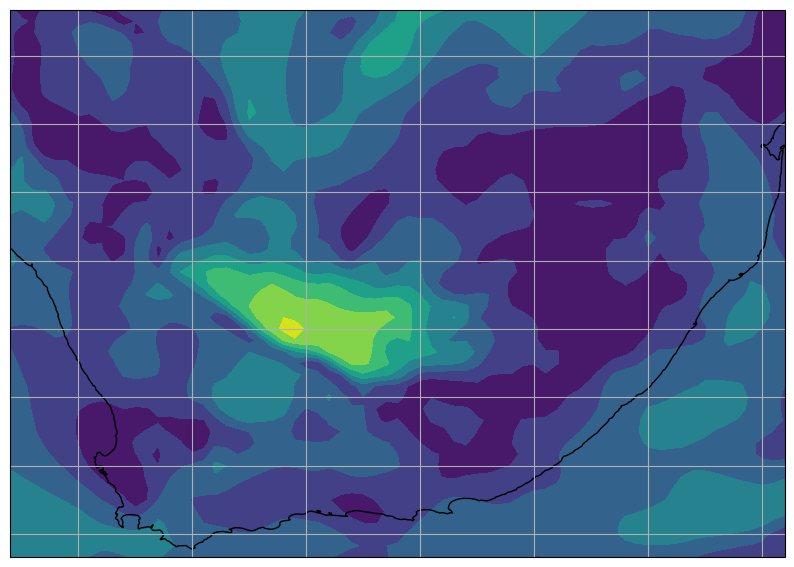

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

time_ =0
varialbe = 6

unstacked = datastore.unstack_grid_coords(datastore._ds["state"].isel(time=time_, state_feature=varialbe))

lon, lat = unstacked.coords['x'], unstacked.coords['y']
# Transpose the data array to match the shape of the coordinates
unstacked = unstacked.transpose('y', 'x')

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.contourf(lon, lat, unstacked.values, transform=ccrs.PlateCarree())

plt.show()